In [ ]:
from scipy.stats import norm
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import random
import sympy as smp
import matplotlib.pyplot as plt
import scipy.integrate as spi

times, dt = np.linspace(0, 1, num=252, retstep=True)
dt

0.00398406374501992

In [ ]:
from scipy.stats import multivariate_normal
import scipy.optimize as opt

AR, MA and ARMA models.


In [ ]:
def ARpath(s0, time_in_years, mu, beta, sigma=0.25, n_observations=252): ##it forecasts future values based on past values
  ts = np.linspace(0, time_in_years, n_observations)
  s = np.zeros_like(ts)
  s[0] = s0 #value of stock at time zero
  for ix, t in enumerate(ts[1:], start=1):
    s[ix] = mu + beta*s[ix - 1] + np.sqrt(sigma) * np.random.randn()
  return s

def MApath(s0, time_in_years, mu, beta, sigma=0.25, n_observations=252):  ##it forecasts future values based on past errors
  ts = np.linspace(0, time_in_years, n_observations)
  s = np.zeros_like(ts)
  s[0] = s0 #value of stock at time zero
  errors = np.zeros_like(ts)
  errors[0] = np.random.randn() * np.sqrt(sigma)
  for ix, t in enumerate(ts[1:], start=1):
    errors[ix] = np.random.randn()
    s[ix] = mu + beta*errors[ix - 1] + np.sqrt(sigma) * errors[ix]
  return s


def ARMApath(s0, time_in_years, mu1, beta, theta, sigma=0.25, n_observations=252):   ##it forecasts future values based on both past errors and values.
  ts = np.linspace(0, time_in_years, n_observations)
  s = np.zeros_like(ts)
  s[0] = s0 #value of stock at time zero
  errors = np.zeros_like(ts)
  errors[0] = np.random.randn() * np.sqrt(sigma)
  for ix, t in enumerate(ts[1:], start=1):
    errors[ix] = np.random.randn()
    s[ix] = mu1 + beta*s[ix - 1] + theta*errors[ix - 1] + np.sqrt(sigma) * errors[ix]
  return s

In [ ]:
#np.random.seed(42)
#stock1 = ARpath(100.0, 1.0, 0.0, 0.98)
#np.random.seed(42)
#stock2 = ARpath(100.0, 1.0, 0.0, 0.98, sigma=0.025)
#np.random.seed(42)
#stock3 = ARpath(100.0, 1.0, 0.0, 0.98, sigma=0.000000001)
#np.random.seed(42)
#stock4 = ARpath(100.0, 1.0, 0.0, 1.02, sigma=0.000000001).  #explosive case
np.random.seed(42)
stock5 = ARpath(100.0, 1.0, 0.0, 0.98, sigma=2.5)
np.random.seed(42)
stock6 = ARpath(100.0, 1.0, 1., 0.98, sigma=2.5)
np.random.seed(42)
stock7 = ARpath(100.0, 1.0, 5., 0.98, sigma=2.5)
np.random.seed(42)
stock8 = ARpath(100.0, 1.0, 5., -0.98, sigma=2.5)

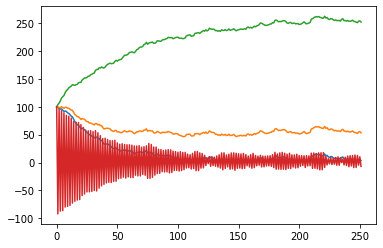

In [ ]:
#plt.plot(stock1)
#plt.plot(stock2)
#plt.plot(stock3)
#plt.plot(stock4)
plt.plot(stock5)
plt.plot(stock6)
plt.plot(stock7)
plt.plot(stock8)
##we have observations on x axis and stock price on y axis.

In [ ]:
np.random.seed(42)
ma1 = MApath(0, 1.0, 0.0, 0.95, sigma=0.025)
np.random.seed(42)
ma2 = MApath(0, 1.0, 0.0, 0.95, sigma=0.25)
np.random.seed(42)
ma3 = MApath(0, 1.0, 0.0, 0.95, sigma=2.5)
np.random.seed(42)
ma4 = MApath(0, 1.0, 0.0, 1.05, sigma=2.5)

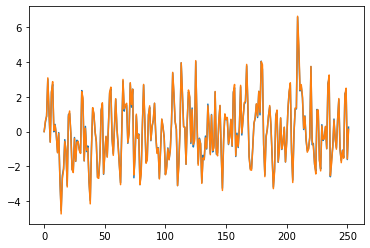

In [ ]:
#plt.plot(ma1)
#plt.plot(ma2)
plt.plot(ma3)
plt.plot(ma4)

In [ ]:
np.random.seed(42)
arma1 = ARMApath(100.0, 1.0, 0.0, 0.99, 0.90, sigma=0.25)
np.random.seed(42)
arma2 = ARMApath(100.0, 1.0, 0.0, 0.99, 0.90, sigma=2.5)
np.random.seed(42)
arma3 = ARMApath(100.0, 1.0, 0.0, 0.99, 0.90, sigma=25)

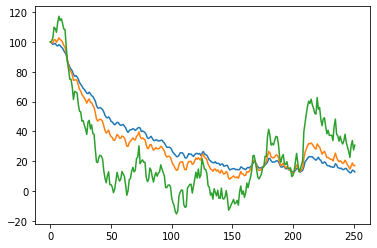

In [ ]:
plt.plot(arma1)
plt.plot(arma2)
plt.plot(arma3)

PORTFOLIO OPTIMIZATION

In [ ]:


n_stocks = 5
dt = 1/252 #time expressed on annual basis
n_years = 1.5
n_observations = int(n_years / dt) ##252
ts = np.cumsum(np.ones(n_observations + 1) * dt)    ##vector of the value of time for each period

s0 = np.array([100.0, 42.0, 0.5, 24.0, 33333.0])
sigma = np.array([0.2, 0.05, 0.35, 0.4, 1.2])
mu = np.array([0.10, 0.08, 0.12, 0.2, 0.35])
corr_matrix = [
    [1.0, 0.5, 0.2, -0.4, -0.02],
    [0.5, 1.0, 0.3, 0.01, 0.02],
    [0.2, 0.3, 1.0, 0.55, -0.2],
    [-0.4, 0.01, 0.55, 1.0, -0.2],
    [-0.02, 0.02, -0.2, -0.2, 1.0],
]

random.seed(33)
mn = multivariate_normal(cov = corr_matrix)

sT = np.zeros((n_observations + 1, n_stocks))
sT[0, :] = s0 #set the all the first row equal to s0

#epsilon = np.random.randn(n_observations, n_stocks)
epsilon = mn.rvs(n_observations)

wT = sigma*np.sqrt(dt)*epsilon
drift = np.ones((n_observations, n_stocks)) * (mu - 0.5*sigma*sigma) * dt
sT[1:, :] = np.exp(drift + wT)
sT_paths = np.cumprod(sT, axis=0) ##we do the comulative product because the stock price of the previous period must be multiplied by the exponential

In [ ]:
log_returns = np.diff(np.log(sT_paths), axis=0) * 100

In [ ]:
stocks_dataframe = pd.DataFrame(sT_paths)

In [ ]:
stocks_dataframe.columns = ['stock' + str(i) for i in range(n_stocks)]

In [ ]:
log_returns_dataframe = np.log(stocks_dataframe).diff() * 100

In [ ]:
weights = np.ones((n_stocks)) * 1 / n_stocks

In [ ]:
random.seed(130)
returns = (log_returns_dataframe.mean() / dt).values ##yearly returns
Sigma = (log_returns_dataframe.cov() / dt).values

In [ ]:
def ptf_variance(w, covariance_matrix):
  w_column = np.atleast_2d(w).T
  w_T = w_column.T
  w_Sigma = np.dot(w_T, covariance_matrix)
  variance = np.dot(w_Sigma, w_column)[0]
  return variance

def ptf_return(w, r):
  return np.dot(w, r)

In [ ]:
def objective_function(w, covariance_matrix):
  return ptf_variance(w, covariance_matrix)

def expected_returns_constraint_func(w, stock_returns, expected_return):
  return np.dot(w, stock_returns) - expected_return

def total_wealth_constraint_func(w):
  return np.sum(w) - 1.0

In [ ]:
def efficient_portfolio(expected_return, market_returns, covariance_matrix):


  expected_return_constraint = {
      'type' : 'eq',
      'fun' : expected_returns_constraint_func,
      'args' : (returns, expected_return)

  }

  total_wealth_constraint = {
      'type' : 'eq',
      'fun' : total_wealth_constraint_func,

  }

  constraints_list = [expected_return_constraint, total_wealth_constraint]
  bounds_list = [(0.0, None) for _ in market_returns]

  initial_weights = np.ones_like(market_returns) / len(market_returns)

  solution = opt.minimize(objective_function, weights, method='SLSQP', args=(covariance_matrix,), bounds=bounds_list, constraints=constraints_list)

  return solution.x

In [ ]:
random.seed(102)
expected_returns = [1.0, 3.0, 5.0, 10.0, 25.0, 35.0]
optimal_portfolios = []

for expected_return in expected_returns:
  optimal_weights = efficient_portfolio(expected_return, returns, Sigma)
  optimal_portfolios.append(optimal_weights)

optimal_portfolios

[array([4.42977353e-01, 1.61875785e-01, 9.21467621e-02, 3.03000099e-01,
        1.13864166e-09]),
 array([0.33915843, 0.3506621 , 0.06699262, 0.24318685, 0.        ]),
 array([2.35339730e-01, 5.39448109e-01, 4.18394042e-02, 1.83372757e-01,
        2.60097297e-11]),
 array([3.44332616e-11, 9.84565469e-01, 2.45824229e-11, 1.50857338e-02,
        3.48797634e-04]),
 array([4.83765171e-11, 9.24053369e-01, 3.00411144e-11, 1.32824346e-02,
        6.26641962e-02]),
 array([1.29841908e-10, 8.83711964e-01, 7.73811127e-11, 1.20802404e-02,
        1.04207796e-01])]

In [ ]:
optimal_portfolios_stdevs = []
optimal_portfolios_returns = []
for w in optimal_portfolios:
  var = ptf_variance(w, Sigma)
  ret = ptf_return(w, returns)
  optimal_portfolios_stdevs.append(np.sqrt(var))
  optimal_portfolios_returns.append(ret)

optimal_portfolios_stdevs

[array([14.88569481]),
 array([12.09821577]),
 array([9.42238253]),
 array([4.80059757]),
 array([8.63375872]),
 array([12.99739439])]

In [ ]:
optimal_portfolios_returns

[0.9999999999999903,
 3.000000058727066,
 5.000000000000719,
 9.999999996783139,
 25.0,
 34.99999999999999]

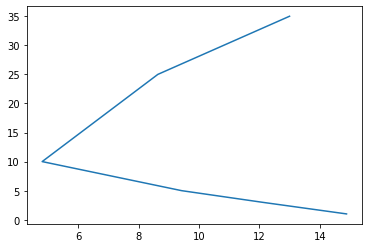

In [ ]:
plt.plot(optimal_portfolios_stdevs, optimal_portfolios_returns)

In [ ]:
log_returns_dataframe['naive_ptf_return'] = np.sum(weights * log_returns_dataframe, axis=1)

<AxesSubplot:>

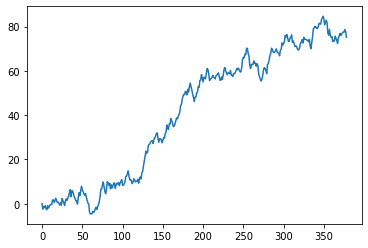

In [ ]:
log_returns_dataframe["naive_ptf_return"].cumsum().plot()

FIXED INCOME CLASS

In [ ]:
import numpy as np
import traceback

class FixedIncome():

    def price_unit_zcb(self, face_value, r, time_to_maturity):
      return face_value * np.exp(-r*time_to_maturity)

    def price_bond(self, face_value, coupon, r, time_to_maturity):
      value = 0
      for t in range(1, time_to_maturity+1):
        value += face_value*coupon*1/(1+r)**t
      value += face_value*1/(1+r)**t
      return value


my_bond = FixedIncome()
my_bond.price_bond(100, 5, 0.02, 5)

2447.3028352350943

Function that returns the price of a UNIT ZCB

In [ ]:
def price_unit_zcb(face_value, risk_free, time_to_maturity):
  return face_value * np.exp(-risk_free*time_to_maturity)

price_unit_zcb(100, 0.002, 3)

99.40179640539353

Function that returns the price of a LONG FORWARD

In [ ]:
def price_long_forward(stock_price, strike_price, risk_free, time_to_maturity):
  return stock_price - strike_price*np.exp(-risk_free*time_to_maturity)

price_long_forward(150, 200, 0.002, 3)

-48.80359281078705

Function that returns the price of a plain vanilla CALL or PUT.

In [ ]:

def price_plain_vanilla_call_or_put(stock_price, stdev, time_to_maturity, strike_price, risk_free, constant_continuous_div_yield=0, call=False, put=False):
  d1 = (np.log(stock_price*np.exp(-constant_continuous_div_yield*(time_to_maturity))/strike_price*np.exp(-risk_free*(time_to_maturity))) + (risk_free + 0.5*stdev**2)*time_to_maturity / (stdev*np.sqrt(time_to_maturity)))
  d2 = d1 - stdev*np.sqrt(time_to_maturity)
  if call:
    return stock_price * np.exp(-constant_continuous_div_yield*(time_to_maturity)) * norm.cdf(d1) - strike_price * np.exp(-risk_free*(time_to_maturity)) * norm.cdf(d2)
  elif put:
    return  strike_price * np.exp(-constant_continuous_div_yield*(time_to_maturity)) * np.exp(-risk_free*(time_to_maturity)) * norm.cdf(-d2) - stock_price * norm.cdf(-d1)
  else:
    raise ValueError("Say if you want to compute the price of a call or a put")

price_plain_vanilla_call_or_put(stock_price=100, stdev=2, time_to_maturity=1, strike_price=100, risk_free=0, constant_continuous_div_yield=0, call=True)


68.2689492137086

Function that returns the price of a digital ASSET OR NOTHING CALL or PUT option.

In [ ]:
def price_asset_or_nothing_call_or_put(stock_price, stdev, time_to_maturity, strike_price, risk_free, constant_continuous_div_yield=0, call=False, put=False):
  d1 = (np.log(stock_price*np.exp(-constant_continuous_div_yield*(time_to_maturity))/strike_price*np.exp(-risk_free*(time_to_maturity))) + (risk_free + 0.5*stdev**2)*time_to_maturity / (stdev*np.sqrt(time_to_maturity)))
  if call:
    return stock_price * np.exp(-constant_continuous_div_yield*(time_to_maturity)) * norm.cdf(d1)
  elif put:
    return stock_price * np.exp(-constant_continuous_div_yield*(time_to_maturity)) * norm.cdf(-d1)
  else:
    raise ValueError("Say if you want to compute the price of a call or a put")


Function that returns the price of a digital CASH OR NOTHING CALL or PUT option

In [ ]:
def price_cash_or_nothing_call_or_put(stock_price, stdev, time_to_maturity, strike_price, risk_free, cash_amount, constant_continuous_div_yield=0, call=False, put=False):
  d1 = (np.log(stock_price*np.exp(-constant_continuous_div_yield*(time_to_maturity))/strike_price*np.exp(-risk_free*(time_to_maturity))) + (risk_free + 0.5*stdev**2)*time_to_maturity / (stdev*np.sqrt(time_to_maturity)))
  d2 = d1 - stdev*np.sqrt(time_to_maturity)

  if call:
    return cash_amount * norm.cdf(d2) * np.exp(-risk_free*(time_to_maturity))
  elif put:
    return cash_amount * norm.cdf(-d2) * np.exp(-risk_free*(time_to_maturity))
  else:
    raise ValueError("Say if you want to compute the price of a call or a put")



price_cash_or_nothing_call_or_put(100, 0.003, 1, 100, 0.02, 0, call=True)

0.0

Function that returns the price of a CONTRACTS WITH MINIMUM GUARANTEED

In [ ]:
def price_contracts_minimum_guaranteed(call_dec=False, put_dec=False, **kwargs):

  if call_dec == True:
    return kwargs["strike_price"] * np.exp(-kwargs["risk_free"]*(kwargs["time_to_maturity"])) + price_plain_vanilla_call_or_put(**kwargs, call=True)
  elif put_dec == True:
    return kwargs["stock_price"] + price_plain_vanilla_call_or_put(**kwargs, put=True)
  else:
    raise ValueError("Say if you want to compute the price using a call decomposition or a put decomposition")


price_contracts_minimum_guaranteed(call_dec=True, strike_price=100, risk_free=0.02, stdev=0.002, time_to_maturity=2, stock_price=100)



100.0

Function that returns the price of a CAP & FLOOR

In [ ]:
def price_cap_floor(min, max, **kwargs):

  aon_arguments = {"stock_price" : kwargs["stock_price"],
                   "stdev" : kwargs["stdev"],
                   "time_to_maturity" : kwargs["time_to_maturity"],
                   "strike_price" : kwargs["strike_price"],
                   "risk_free" : kwargs["risk_free"] }

  kwargs["strike_price"] = min
  asset_or_nothing_call_k = price_asset_or_nothing_call_or_put(**aon_arguments, call=True)

  kwargs["strike_price"] = max
  asset_or_nothing_call_h = price_asset_or_nothing_call_or_put(**aon_arguments, call=True)

  kwargs["strike_price"] = kwargs["cash_amount"] = min
  cash_or_nothing_put = price_cash_or_nothing_call_or_put(**kwargs, put=True)

  kwargs["strike_price"] = kwargs["cash_amount"] = max
  cash_or_nothing_call = price_cash_or_nothing_call_or_put(**kwargs, call=True)


  return cash_or_nothing_put + asset_or_nothing_call_k - asset_or_nothing_call_h + cash_or_nothing_call



Function that returns the values of a GREEK of the desired contract.

In [ ]:
def greek(contract_price_function, variable_to_derive, small_increment, **kwargs):
    if variable_to_derive not in kwargs:
      return 0
    else:
      f_0 = contract_price_function(**kwargs)
      kwargs[variable_to_derive] += small_increment
      f_plus = contract_price_function(**kwargs)
      return (f_plus - f_0) / small_increment ##returns the function increment w.r. to the x increment

greek(price_unit_zcb, 'strike_price', 0.1, face_value=100, risk_free=0.2, time_to_maturity=1)


NameError: ignored

In [ ]:
def hedging_long_forward(number_of_contracts, call_kwargs, put_kwargs):

  value_long_forward_position = number_of_contracts*price_plain_vanilla_call_or_put(**call_kwargs, call=True) - number_of_contracts*price_plain_vanilla_call_or_put(**put_kwargs, put=True)
  value_plain_vanilla_call_position = number_of_contracts*price_plain_vanilla_call_or_put(**call_kwargs, call=True)
  value_plain_vanilla_put_position = number_of_contracts*price_plain_vanilla_call_or_put(**put_kwargs, put=True)

  return value_long_forward_position, {
      "plain vanilla call" : (number_of_contracts, value_plain_vanilla_call_position),
      "plain vanilla put" : (-number_of_contracts, value_plain_vanilla_put_position)
  }

c_arg = {
    "stock_price" : 100,
    "stdev" : 0.003,
    "time_to_maturity" : 1,
    "strike_price" : 100,
    "risk_free" : 0.02
}

p_arg = {
    "stock_price" : 80,
    "stdev" : 0.01,
    "time_to_maturity" : 1,
    "strike_price" : 110,
    "risk_free" : 0.02
}

hedging_long_forward(1, c_arg, p_arg)





(0.5420064837632355,
 {'plain vanilla call': (1, 1.980132669325016),
  'plain vanilla put': (-1, 1.4381261855617806)})

Example of a one-period binomial model for having sold a call option.

In [ ]:
stock_price = 150
risk_free = 0.02
strike_price = 120
u = 1.1
d = 0.9
qu = ((1 + risk_free) - d) / (u - d)
qd = 1 - qu
fu = max(stock_price * u  - strike_price, 0)
fd = max(stock_price * d - strike_price, 0)

f_present_value = (qu * fu + qd * fd) / (1 + risk_free)

number_of_stocks = (fu - fd) / stock_price*(u - d)
number_of_mma = (u*fd - d*fu) / (1 + risk_free)*(u - d)

number_of_mma

-4.7058823529411775

Example of a two-period binomial model for having sold a call option.

In [ ]:
stock_price = 150
risk_free = 0.02
strike_price = 120
u = 1.1
d = 0.9
qu = ((1 + risk_free) - d) / (u - d)
qd = 1 - qu

fuu = max(stock_price*u**2  - strike_price, 0)
fud = max(stock_price*u*d - strike_price, 0)
fdd = max(stock_price*d**2 - strike_price, 0)

f_present_value = (qu**2*fuu + 2*qu*qd*fud + qd**2*fdd) / (1 + risk_free)**2

fu = (qu*fuu + qd*fud) / (1 + risk_free)
fd = (qu*fud + qd*fdd) / (1 + risk_free)


number_of_stocks = ((fu - fd) / stock_price*(u - d))
number_of_mma = ((u*fd - d*fu) / (1 + risk_free)*(u - d))

number_of_mma

-4.613610149942333

Example of a three-period binomial model for having sold a call option.

In [ ]:
stock_price = 150
risk_free = 0.02
strike_price = 120
u = 1.1
d = 0.9
qu = ((1 + risk_free) - d) / (u - d)
qd = 1 - qu

fuuu = max(stock_price*u**3 - strike_price, 0)
fuud = max(stock_price*(u**2)*d - strike_price, 0)
fudd = max(stock_price*u*(d**2) - strike_price, 0)
fddd = max(stock_price*d**3 - strike_price, 0)

f_present_value = ((qu**3)*fuuu + 3*(qu**2)*qd*fuud + 3*qu*(qd**2)*fudd + (qd**3)*fddd) / (1 + risk_free)**3

fu = (qu**2*fuuu + 2*qu*qd*fuud + qd**2*fudd) / (1 + risk_free)**2
fd = (qu**2*fuud + 2*qu*qd*fudd + qd**2*fddd) / (1 + risk_free)**2

number_of_stocks = ((fu - fd) / stock_price*(u - d))
number_of_mma = ((u*fd - d*fu) / (1 + risk_free)*(u - d))


number_of_stocks

0.03781622452902734

Function that returns payoff and  the plot of a PLAIN VANILLA

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
        70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
        87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 [<matplotlib.lines.Line2D at 0x7f191377c6d0>])

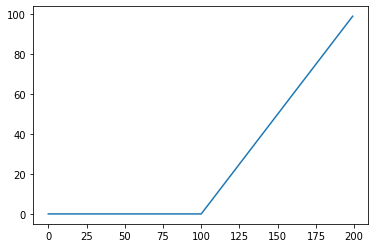

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plain_vanilla_payoff_and_plot(stock_price_array, strike_price, call=False, put=False):

  if call:
    payoff_value = np.array([max(s - strike_price, 0) for s in stock_price_array])
    return payoff_value, plt.plot(stock_price_array, payoff_value)
  elif put:
    payoff_value = np.array([max(strike_price - s, 0) for s in stock_price_array])
    return payoff_value, plt.plot(stock_price_array, payoff_value)
  else:
    raise ValueError("Say if you want the plot of a call or a put payoff")

plain_vanilla_payoff_and_plot(np.array([i for i in range(200)]), 100, call=True)



Function that returns payoff and  the plot of a CASH OR NOTHING

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100

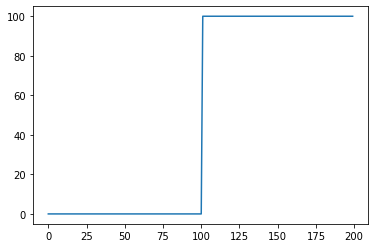

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def cash_or_nothing_payoff_and_plot(stock_price_array, strike_price, cash_amount, call=False, put=False):

  if call:
    payoff_value = np.array([cash_amount if s > strike_price else 0 for s in stock_price_array])
    return payoff_value, plt.plot(stock_price_array, payoff_value)
  elif put:
    payoff_value = np.array([cash_amount if s <= strike_price else 0 for s in stock_price_array])
    return payoff_value, plt.plot(stock_price_array, payoff_value)
  else:
    raise ValueError("Say if you want the plot of a call or a put payoff")


cash_or_nothing_payoff_and_plot(np.array([i for i in range(200)]), 100, 100, call=True)

Function that returns payoff and  the plot of an ASSET OR NOTHING

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

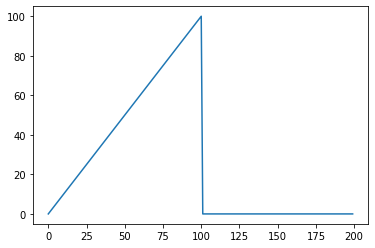

In [ ]:
def asset_or_nothing_payoff_and_plot(stock_price_array, strike_price, call=False, put=False):

  if call:
    payoff_value = np.array([s if s > strike_price else 0 for s in stock_price_array])
    return payoff_value, plt.plot(stock_price_array, payoff_value)
  elif put:
    payoff_value = np.array([s if s <= strike_price else 0 for s in stock_price_array])
    return payoff_value, plt.plot(stock_price_array, payoff_value)
  else:
    raise ValueError("Say if you want the plot of a call or a put payoff")


asset_or_nothing_payoff_and_plot(np.array([i for i in range(200)]), 100, put=True)

Function that returns payoff and  the plot of a LONG FORWARD

(array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
         -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
         -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
         -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
         -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
         -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
         -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
         -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
         -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
          -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
          10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
          21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
          32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
          43,   44,   45,   46,   47, 

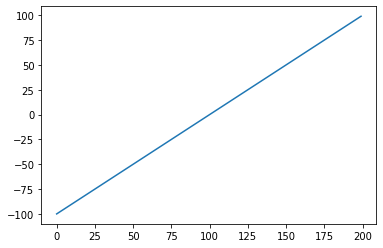

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def long_forward_payoff_and_plot(stock_price_array, strike_price):
  payoff_value = np.array([s - strike_price for s in stock_price_array])
  return payoff_value, plt.plot(stock_price_array, payoff_value)

long_forward_payoff_and_plot(np.array([i for i in range(200)]), 100)

Function that returns the payoff and the plot of a UNIT T-BOND payoff

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1]), [<matplotlib.lines.Line2D at 0x7f191362d730>])

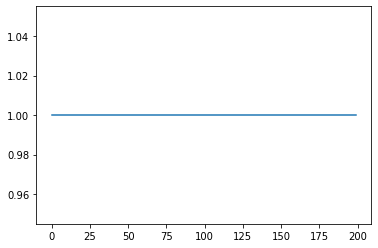

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def unit_t_bond_payoff_and_plot(stock_price_array):
  payoff_value = np.array([1 for s in stock_price_array])
  return payoff_value, plt.plot(stock_price_array, payoff_value)


unit_t_bond_payoff_and_plot(np.array([i for i in range(200)]))

Plots of all the parities

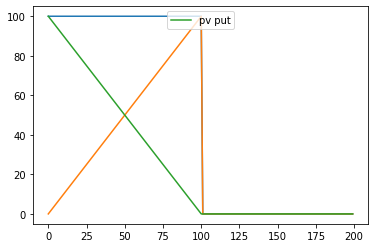

In [ ]:
from matplotlib import pyplot
#plt.rcParams["figure.autolayout"] = True


a = np.array([i for i in range(200)])
#plt.plot(plain_vanilla_payoff_and_plot(a, 100, call=True)[0] - plain_vanilla_payoff_and_plot(a, 100, put=True)[0], label="long forward")
#plt.plot(cash_or_nothing_payoff_and_plot(a, 100, 150, call=True)[0] + cash_or_nothing_payoff_and_plot(a, 100, 150, put=True)[0], label="T-bond")
#plt.plot(asset_or_nothing_payoff_and_plot(a, 100, call=True)[0] + asset_or_nothing_payoff_and_plot(a, 100, put=True)[0], label="long stock")
#plt.plot(asset_or_nothing_payoff_and_plot(a, 100, call=True)[0] - cash_or_nothing_payoff_and_plot(a, 100, 100, call=True)[0], label="pv call")
plt.plot(cash_or_nothing_payoff_and_plot(a, 100, 100, put=True)[0] - asset_or_nothing_payoff_and_plot(a, 100, put=True)[0], label="pv put")

plt.legend(loc='upper center')

Geometric Brownian Motion with constant coefficients

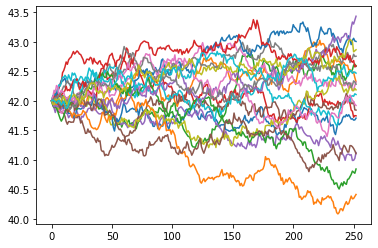

In [ ]:
n_paths = 20
dt = 1/252 #time expressed on annual basis
n_years = 1
n_observations = int(n_years / dt) ##252
ts = np.cumsum(np.ones(n_observations) * dt)    ##vector of the value of time for each period

s0 = 42
mu = 0.01
sigma = 0.02

sT = np.zeros((n_observations + 1, n_paths))
sT[0, :] = s0 #set the all the first row equal to s0

epsilon = np.random.randn(n_observations, n_paths)
wT = sigma*np.sqrt(dt)*epsilon
drift = (mu - 0.5*sigma*sigma) * np.ones((n_observations, 1)) * dt
sT[1:, :] = np.exp(drift + wT)
sT_paths = np.cumprod(sT, axis=0) ##we do the comulative product because the stock price of the previous period must be multiplied by the exponential

plt.plot(sT_paths)




VASICEK MODEL (with P-probabilities)

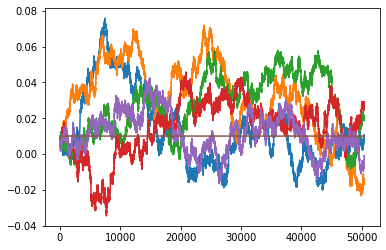

In [ ]:

n_paths = 5
dt = 1/252 #daily time expressed in years
n_years = 200
n_observations = int(n_years / dt)

alpha = 0.03
sigma = 0.005
gamma = 0.01

r0 = 0.007 #value of the interest rate today that we're gonna see on the market
rT = np.zeros((n_observations + 1, n_paths))
rT[0, :] = r0


np.random.seed(11)
current_interest_rate = lambda r0 : gamma - (gamma - r0)*np.exp(-alpha*dt) + np.sqrt(((sigma**2)/(2*alpha))*(1 - np.exp(-2*alpha*dt)))*np.random.randn()
interest_matrix = np.ones((n_observations + 1, n_paths))
interest_matrix[0, :] = r0



for i in range(1, rT.shape[0]):
  for j in range(rT.shape[1]):
    rT[i, j] = interest_matrix[i, j] = current_interest_rate(interest_matrix[i-1, j])

plt.plot(rT)
plt.plot([gamma for i in range(n_observations)])

VASICEK MODEL (with Q-probabilities)

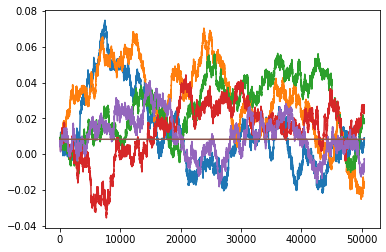

In [ ]:
n_paths = 5
dt = 1/252 #daily time expressed in years
n_years = 200
n_observations = int(n_years / dt)

alpha = 0.03
sigma = 0.005
gamma_constant = 0.01
Lambda = 0.01 #sharpe ratio
gamma = gamma_constant - ((sigma*Lambda)/alpha)

r0 = 0.007 #value of the interest rate today that we're gonna see on the market
rT = np.zeros((n_observations + 1, n_paths))
rT[0, :] = r0


np.random.seed(11)
current_interest_rate = lambda r0 : gamma - (gamma - r0)*np.exp(-alpha*dt) + np.sqrt(((sigma**2)/(2*alpha))*(1 - np.exp(-2*alpha*dt)))*np.random.randn()
interest_matrix = np.ones((n_observations + 1, n_paths))
interest_matrix[0, :] = r0



for i in range(1, rT.shape[0]):
  for j in range(rT.shape[1]):
    rT[i, j] = interest_matrix[i, j] = current_interest_rate(interest_matrix[i-1, j])

plt.plot(rT)
plt.plot([gamma for i in range(n_observations)])

COX, INGERSOLL AND ROSS MODEL (P-probabilities)

0.01

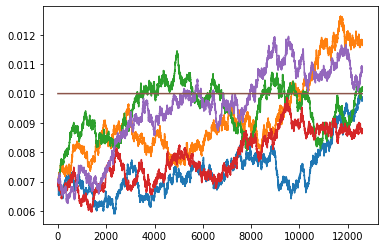

In [ ]:
n_paths = 5
dt = 1/252 #daily time expressed in years
n_years = 50
n_observations = int(n_years / dt)

alpha = 0.03
sigma = 0.005
gamma = 0.01

r0 = 0.007 #value of the interest rate today that we're gonna see on the market
rT = np.zeros((n_observations + 1, n_paths))
rT[0, :] = r0


np.random.seed(100)
current_interest_rate = lambda r0 : gamma - (gamma - r0)*np.exp(-alpha*dt) + np.sqrt(((sigma**2)/(2*alpha))*(1 - np.exp((-alpha*dt)))*(gamma - (gamma - 2*r0)*np.exp(-alpha*dt)))*np.random.randn()
interest_matrix = np.ones((n_observations + 1, n_paths))
interest_matrix[0, :] = r0



for i in range(1, rT.shape[0]):
  for j in range(rT.shape[1]):
    rT[i, j] = interest_matrix[i, j] = current_interest_rate(interest_matrix[i-1, j])


plt.plot(rT)
plt.plot([gamma for i in range(n_observations)])
gamma

COX, INGERSOLL AND ROSS MODEL (Q-probabilities)

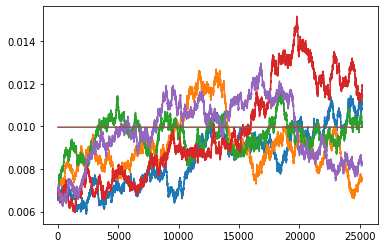

In [ ]:
n_paths = 5
dt = 1/252 #daily time expressed in years
n_years = 100
n_observations = int(n_years / dt)

c = 0.02
Lambda = lambda r0 : c*np.sqrt(r0)
alpha_constant = 0.03
alpha = alpha_constant + c*sigma
sigma = 0.005
gamma_constant = 0.01
gamma = (alpha_constant*gamma_constant) / alpha

r0 = 0.007 #value of the interest rate today that we're gonna see on the market
rT = np.zeros((n_observations + 1, n_paths))
rT[0, :] = r0


np.random.seed(100)
current_interest_rate = lambda r0 : gamma - (gamma - r0)*np.exp(-alpha*dt) + np.sqrt(((sigma**2)/(2*alpha))*(1 - np.exp((-alpha*dt)))*(gamma - (gamma - 2*r0)*np.exp(-alpha*dt)))*np.random.randn()
interest_matrix = np.ones((n_observations + 1, n_paths))
interest_matrix[0, :] = r0



for i in range(1, rT.shape[0]):
  for j in range(rT.shape[1]):
    rT[i, j] = interest_matrix[i, j] = current_interest_rate(interest_matrix[i-1, j])


plt.plot(rT)
plt.plot([gamma for i in range(n_observations)])

Gamma distribution

0.4925559698015313

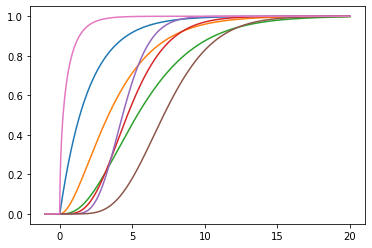

In [ ]:
import scipy.stats

from scipy.special import gamma, factorial
import numpy as np


def gamma_distribution(x, alpha, teta, cumulative=False, density=False):

  y = x / teta

  def lower_incomplete_gamma_function(u, alpha):
    return ((u)**(alpha - 1))*np.exp(-u)

  if cumulative:
    return 0 if x <= 0 else ((1 / gamma(alpha)) * (spi.quad(lower_incomplete_gamma_function, 0, y, alpha)[0]))
  elif density:
    return 0 if x <= 0 else  (((x**(alpha - 1)) * (np.exp(-x/teta))) / ((gamma(alpha))*(teta**alpha)))
  else:
    raise ValueError("Say if you want to compute the CDF or the PDF")





x_series = np.linspace(-1, 20, num=1000)


#plt.plot(x_series, [gamma_distribution(x_series[index], 1, 2, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [gamma_distribution(x_series[index], 2, 2, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [gamma_distribution(x_series[index], 3, 2, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [gamma_distribution(x_series[index], 5, 1, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [gamma_distribution(x_series[index], 9, 0.5, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [gamma_distribution(x_series[index], 7.5, 1, density=True) for index, number in enumerate(x_series)])

plt.plot(x_series, [gamma_distribution(x_series[index], 1, 2, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [gamma_distribution(x_series[index], 2, 2, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [gamma_distribution(x_series[index], 3, 2, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [gamma_distribution(x_series[index], 5, 1, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [gamma_distribution(x_series[index], 9, 0.5, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [gamma_distribution(x_series[index], 7.5, 1, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [gamma_distribution(x_series[index], 0.5, 1, cumulative=True) for index, number in enumerate(x_series)])


gamma_distribution(0.03, 1, 2, density=True)



#def ff(x, alpha, teta):
  #return 0 if x <= 0 else x*((1 / (gamma(alpha))*teta**alpha)*((x**(alpha - 1))*(np.exp(-(x / teta)))))
#spi.quad(ff, 0, np.inf, (2, 1))


Gaussian distribution

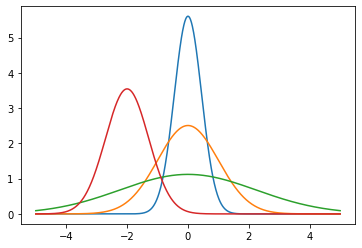

In [ ]:

from scipy.special import gamma, factorial, erf

def gaussian_distribution(x, mu, sigma, cumulative=False, density=False):

  if cumulative:
    return 0.5*(1 + erf((x - mu)/(np.sqrt(sigma)*np.sqrt(2))))
  elif density:
    return (1 / np.sqrt(sigma)*np.sqrt(2*np.pi))*np.exp(-0.5*((x - mu) / np.sqrt(sigma))**2)
  else:
    raise ValueError("Say if you want to compute the CDF or the PDF")

x_series = np.linspace(-5, 5, num=1000)



#plt.plot(x_series, [gaussian_distribution(x_series[index], 0, 0.2, cumulative=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [gaussian_distribution(x_series[index], 0, 1, cumulative=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [gaussian_distribution(x_series[index], 0, 5, cumulative=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [gaussian_distribution(x_series[index], -2, 0.5, cumulative=True) for index, number in enumerate(x_series)])

plt.plot(x_series, [gaussian_distribution(x_series[index], 0, 0.2, density=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [gaussian_distribution(x_series[index], 0, 1, density=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [gaussian_distribution(x_series[index], 0, 5, density=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [gaussian_distribution(x_series[index], -2, 0.5, density=True) for index, number in enumerate(x_series)])



Inverse Gaussian distribution

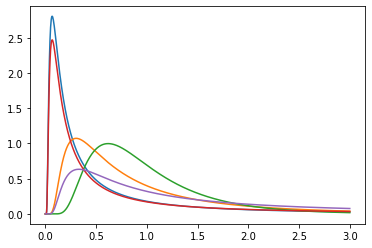

In [ ]:


def inverse_gaussian_distribution(x, mu, Lambda, cumulative=False, density=False):

  if cumulative:
    return 0 if x <= 0 else gaussian_distribution(np.sqrt(Lambda/x)*(x/mu - 1), 0, 1, cumulative=True) + np.exp(2*Lambda/mu)*gaussian_distribution(-(np.sqrt(Lambda/x)*(x/mu + 1)), 0, 1, cumulative=True)
  elif density:
    return 0 if x <= 0 else np.sqrt((Lambda)/(2*np.pi*x**3))*np.exp(-((Lambda*(x - mu)**2) / (2*(mu**2)*x)))
  else:
    raise ValueError("Say if you want to compute the CDF or the PDF")



x_series = np.linspace(0, 3, num=1000)


#plt.plot(x_series, [inverse_gaussian_distribution(x_series[index], 1, 0.2, cumulative=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [inverse_gaussian_distribution(x_series[index], 1, 1, cumulative=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [inverse_gaussian_distribution(x_series[index], 1, 3, cumulative=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [inverse_gaussian_distribution(x_series[index], 3, 0.2, cumulative=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [inverse_gaussian_distribution(x_series[index], 3, 1, cumulative=True) for index, number in enumerate(x_series)])


plt.plot(x_series, [inverse_gaussian_distribution(x_series[index], 1, 0.2, density=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [inverse_gaussian_distribution(x_series[index], 1, 1, density=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [inverse_gaussian_distribution(x_series[index], 1, 3, density=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [inverse_gaussian_distribution(x_series[index], 3, 0.2, density=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [inverse_gaussian_distribution(x_series[index], 3, 1, density=True) for index, number in enumerate(x_series)])

Exponential distribution

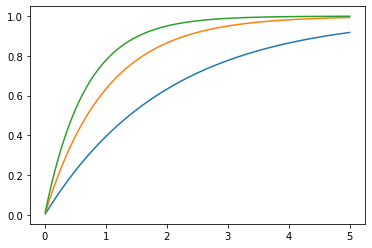

In [ ]:
def exponential_distribution(x, Lambda, cumulative=False, density=False):

  if cumulative:
    return 0 if x <= 0 else 1 - np.exp(-Lambda*x)
  elif density:
    return 0 if x <= 0 else Lambda*np.exp(-Lambda*x)
  else:
    raise ValueError("Say if you want to compute the CDF or the PDF")


x_series = np.linspace(0.01, 5, num=1000)

plt.plot(x_series, [exponential_distribution(x_series[index], 0.5, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [exponential_distribution(x_series[index], 1, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [exponential_distribution(x_series[index], 1.5, cumulative=True) for index, number in enumerate(x_series)])

#plt.plot(x_series, [exponential_distribution(x_series[index], 0.5, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [exponential_distribution(x_series[index], 1, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [exponential_distribution(x_series[index], 1.5, density=True) for index, number in enumerate(x_series)])

Chi-squared distribution

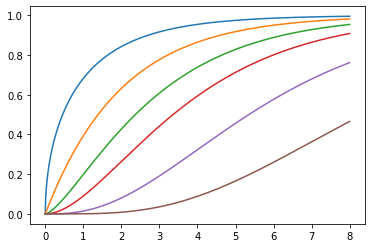

In [ ]:

from scipy.special import gammainc

def chi_squared_distribution(x, k, cumulative=False, density=False):

  y = x / 2

  def lower_incomplete_gamma_function(u, k):
    return ((u)**(k/2 - 1))*np.exp(-u)

  if cumulative:
    if k == 1:
      return 0 if x <= 0 else (1 / gamma(k/2))*spi.quad(lower_incomplete_gamma_function, 0, y, k)[0]
    else:
      return 0 if x < 0 else (1 / gamma(k/2))*spi.quad(lower_incomplete_gamma_function, 0, y, k)[0]
  elif density:
    if k == 1:
      return 0 if x <= 0 else (1 / ((2**(k/2))*gamma(k/2)))*x**((k/2)-1)*np.exp(-x/2)
    else:
      return 0 if x < 0 else (1 / ((2**(k/2))*gamma(k/2)))*x**((k/2)-1)*np.exp(-x/2)
  else:
    raise ValueError("Say if you want to compute the CDF or the PDF")



x_series = np.linspace(0, 8, num=1000)

#plt.plot(x_series, [chi_squared_distribution(x_series[index], 1, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [chi_squared_distribution(x_series[index], 2, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [chi_squared_distribution(x_series[index], 3, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [chi_squared_distribution(x_series[index], 4, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [chi_squared_distribution(x_series[index], 6, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [chi_squared_distribution(x_series[index], 9, density=True) for index, number in enumerate(x_series)])

plt.plot(x_series, [chi_squared_distribution(x_series[index], 1, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [chi_squared_distribution(x_series[index], 2, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [chi_squared_distribution(x_series[index], 3, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [chi_squared_distribution(x_series[index], 4, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [chi_squared_distribution(x_series[index], 6, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [chi_squared_distribution(x_series[index], 9, cumulative=True) for index, number in enumerate(x_series)])

Half-normal distribution

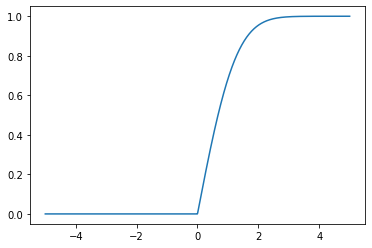

In [ ]:

from scipy.special import erf

def half_normal_distribution(x, sigma, cumulative=False, density=False):

  if cumulative:
    return 0 if x < 0 else erf(x/(sigma*np.sqrt(2)))
  elif density:
    return 0 if x < 0 else ((np.sqrt(2))/(sigma*np.sqrt(np.pi)))*np.exp(-((x**2)/(2*sigma**2)))
  else:
    raise ValueError("Say if you want to compute the CDF or the PDF")


x_series = np.linspace(-5, 5, num=1000)


#plt.plot(x_series, [half_normal_distribution(x_series[index], 1, density=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [half_normal_distribution(x_series[index], 1, cumulative=True) for index, number in enumerate(x_series)])

Generalized normal distribution

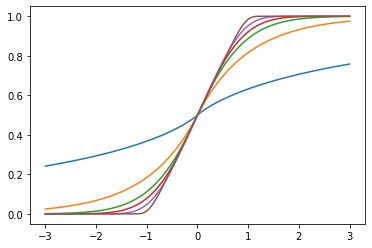

In [ ]:
from scipy.special import gammainc

def generalized_normal_distribution(x, alpha, beta, mu, cumulative=False, density=False):

  y = (abs((x-mu) / alpha))**beta

  def lower_incomplete_gamma_function(u, beta):
    return ((u)**(1/beta - 1))*np.exp(-u)

  if cumulative:
    return 0.5 + (np.sign(x-mu))*(1 / (2*gamma(1/beta)))*(spi.quad(lower_incomplete_gamma_function, 0, y, beta)[0])
  elif density:
    return (beta * np.exp(-((abs(x-mu)/alpha))**beta)) / (2*alpha*gamma(1/beta))
  else:
    raise ValueError("Say if you want to compute the CDF or the PDF")


x_series = np.linspace(-3, 3, num=1000)

#plt.plot(x_series, [generalized_normal_distribution(x_series[index], 0.5, 0.5, 0, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [generalized_normal_distribution(x_series[index], 0.5, 1, 0, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [generalized_normal_distribution(x_series[index], 0.5, 1.5, 0, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [generalized_normal_distribution(x_series[index], 0.5, 2, 0, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [generalized_normal_distribution(x_series[index], 0.5, 3, 0, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [generalized_normal_distribution(x_series[index], 0.5, 8, 0, density=True) for index, number in enumerate(x_series)])

plt.plot(x_series, [generalized_normal_distribution(x_series[index], 1, 0.5, 0, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [generalized_normal_distribution(x_series[index], 1, 1, 0, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [generalized_normal_distribution(x_series[index], 1, 1.5, 0, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [generalized_normal_distribution(x_series[index], 1, 2, 0, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [generalized_normal_distribution(x_series[index], 1, 3, 0, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [generalized_normal_distribution(x_series[index], 1, 8, 0, cumulative=True) for index, number in enumerate(x_series)])

Student's T distribution

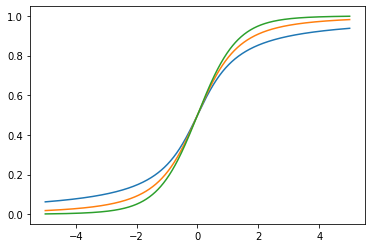

In [ ]:
from scipy.special import hyp2f1


def students_t_distribution(x, degrees_of_freedom, cumulative=False, density=False):

  if cumulative:
    return 0.5 + (x*gamma((degrees_of_freedom + 1) / 2))*(hyp2f1(0.5, ((degrees_of_freedom + 1) / 2), 3/2, -x**2/degrees_of_freedom) / (np.sqrt(np.pi*degrees_of_freedom)*gamma(degrees_of_freedom/2)))
  elif density:
    return (gamma((degrees_of_freedom + 1) / 2) / (np.sqrt(degrees_of_freedom*np.pi)*gamma(degrees_of_freedom/2)))*(1+(x**2/degrees_of_freedom))**(-(degrees_of_freedom + 1)/2)
  else:
    raise ValueError("Say if you want to compute the CDF or the PDF")

x_series = np.linspace(-5, 5, num=1000)



#plt.plot(x_series, [students_t_distribution(x_series[index], 1, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [students_t_distribution(x_series[index], 2, density=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [students_t_distribution(x_series[index], 5, density=True) for index, number in enumerate(x_series)])

plt.plot(x_series, [students_t_distribution(x_series[index], 1, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [students_t_distribution(x_series[index], 2, cumulative=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [students_t_distribution(x_series[index], 5, cumulative=True) for index, number in enumerate(x_series)])



Levy distribution

<ipython-input-91-07b05da276ec>:8: RuntimeWarning: divide by zero encountered in double_scalars
  return 0 if x < mu else (np.sqrt((c) / (2*np.pi))) * ((np.exp(-(c) / (2*(x-mu)))) / (x - mu)**(3/2))
<ipython-input-91-07b05da276ec>:8: RuntimeWarning: invalid value encountered in double_scalars
  return 0 if x < mu else (np.sqrt((c) / (2*np.pi))) * ((np.exp(-(c) / (2*(x-mu)))) / (x - mu)**(3/2))


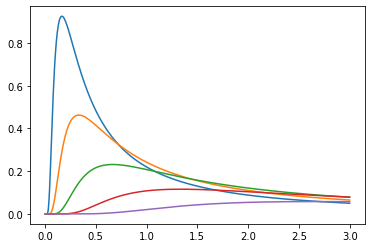

In [ ]:
from scipy.special import erfc

def levy_distribution(x, c, mu, cumulative=False, density=False):

  if cumulative:
    return 0 if x < mu else erfc(np.sqrt((c) / (2*(x - mu))))
  elif density:
    return 0 if x < mu else (np.sqrt((c) / (2*np.pi))) * ((np.exp(-(c) / (2*(x-mu)))) / (x - mu)**(3/2))
  else:
    raise ValueError("Say if you want to compute the CDF or the PDF")


x_series = np.linspace(0, 3.0, num=1000)


#plt.plot(x_series, [levy_distribution(x_series[index], 0.5, 0, cumulative=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [levy_distribution(x_series[index], 1, 0, cumulative=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [levy_distribution(x_series[index], 2, 0, cumulative=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [levy_distribution(x_series[index], 4, 0, cumulative=True) for index, number in enumerate(x_series)])
#plt.plot(x_series, [levy_distribution(x_series[index], 8, 0, cumulative=True) for index, number in enumerate(x_series)])

plt.plot(x_series, [levy_distribution(x_series[index], 0.5, 0, density=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [levy_distribution(x_series[index], 1, 0, density=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [levy_distribution(x_series[index], 2, 0, density=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [levy_distribution(x_series[index], 4, 0, density=True) for index, number in enumerate(x_series)])
plt.plot(x_series, [levy_distribution(x_series[index], 8, 0, density=True) for index, number in enumerate(x_series)])

Interpolation

103.01764705882351


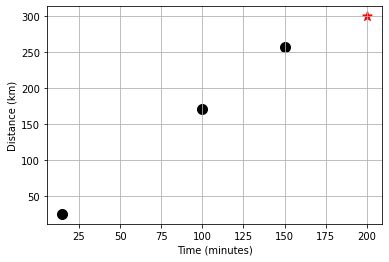

In [ ]:
# the numpy.interp function linearly interpolates
import numpy as np
from matplotlib import pyplot as plt


t = [15, 100, 150]
s = [25.75, 171.7, 257.7]

t_ex = [200]
s_ex = [300]

s_60 = np.interp(60, t, s)
print(s_60)


plt.scatter(t, s, marker="o", s=100, color='black') #s is the size of the points
plt.scatter(t_ex, s_ex, marker="*", s=100, color="red")
plt.xlabel("Time (minutes)")
plt.ylabel("Distance (km)")
plt.grid(True)
plt.show()

 Discount Curve class

In [ ]:
# discount curve class
from math import log, exp

class DiscountCurve:
  """
  This class represents a discount curve we want to work with

  """
  def __init__(self, pillars, dfs):
    self.start_date = pillars[0] #set the start date equal to the first one of the list od dates
    self.pillars = [(p-self.start_date).days for p in pillars]  #set a list with all the T-t differences
    self.log_dfs = [log(df) for df in dfs] #logarithm of each discount factor

  def df(self, d):
    """
    This method is called when we want to compute the discount factor
    of a specific date

    """
    d_days = (d-self.start_date).days #here we set the day we want to compute the discount factor to
    if d_days < 0:
      print ("Doesn't make sense to ask a discount factor in the past.") #if the day is lower than 0 we can't interpolate the result
      return None
    elif d_days > self.pillars[-1]:
      print ("np.interp does not allow to extrapolate.") #same thing if the date goes out from the interval we established
      return None
    else:
      return exp(np.interp(d_days, self.pillars, self.log_dfs)) #if neither of the 2 conditions above are verified, we can interpolate the discount factor

Forward Rates class

In [ ]:
import numpy as np
from math import exp

class ForwardRateCurve:
  """
  This class represents a Forward rate Curve
  """
  def __init__(self, pillars, rates):
    self.start_date = pillars[0] #set the initial date to the first of the pillar ones
    self.pillar_days = [(p-pillars[0]).days/365 for p in pillars] #set all the time differences
    self.rates = rates

  def interp_rate(self, d):
    d_frac = (d-self.start_date).days/365  #we set the day we want to interpolate the rate and convert it to years
    if d_frac < self.pillar_days[0] or d_frac > self.pillar_days[-1]: #if the rate is before the first of pillars of above the last of the pillars it is not possible to bootstrap the rate
      print ("Cannot extrapolate rates.")
      return None, None
    else:
      return d_frac, np.interp(d_frac, self.pillar_days, self.rates) #if neither of the 2 conditions above happen, we can extrapolate the rate

  def forward_rate(self, d1, d2):
    d1_frac, r1 = self.interp_rate(d1) #we interp a rate at time d1, getting both the date and the rate interpolated
    d2_frac, r2 = self.interp_rate(d2) #we interp a rate at time d2, getting both the date and the rate interpolated
    if d1_frac is None or d2_frac is None:
      return None
    else:
      return (r2*d2_frac - r1*d1_frac)/(d2_frac - d1_frac) #if neither of the 2 conditions above happen, we can compute the forward rate

Bootstrapping with the bisection method





In [ ]:
# find zeros of previous eq. with bisect
import numpy as np
from scipy.optimize import bisect

def f(y):
    return 8/(1+0.04) + 8/np.power((1+0.0502), 2) + 8/np.power((1+0.0608), 3) + 8/np.power((1+0.0719), 4) + 108/np.power((1+y), 5) - 100

y = bisect(f, 0, 1)
print (y)

0.08359293790454103


Bootstrapping with Brent method

In [ ]:
# find zeros of previous eq. with brentq
from scipy.optimize import brentq

brentq(f, 0, 1)

0.0835929379032288

How handle the errors

In [ ]:

try:
  age = int(input("Input: "))
except ValueError:
  print("the number inserted in not an integer")
except:
  print("an exception different from the valueerror has been found")
else:
  print("no exceptions found")
finally:
  print("This message is always executed")

Input: 9
no exceptions found
This message is always executed
